## Programa final que representa dos formas de ondas y sus series de Fourier.

Seleccione la señal que desea representar y analizar su armónicos y espectro en frecuencia. 

En la grafica final se visualiza:  
1- La señal ft(t)
2- La descomposición en series de Fourier, con sus armónicos senos y cosenos, la señal ft(t) y la sematoria de la serie.
3- La representación del espectro en frecuencia, como el módulo de los coeficientes ck. 

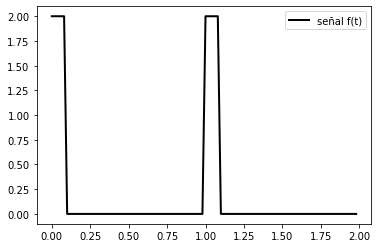

Piecewise((2.0, (t >= 0) & (t < 0.1)), (0.0, (t >= 0.1) & (t < 1.0)))


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


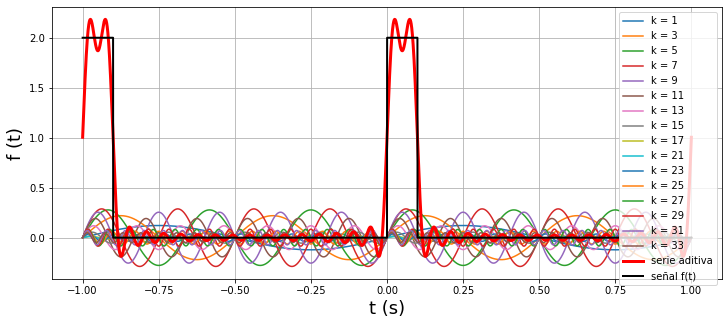

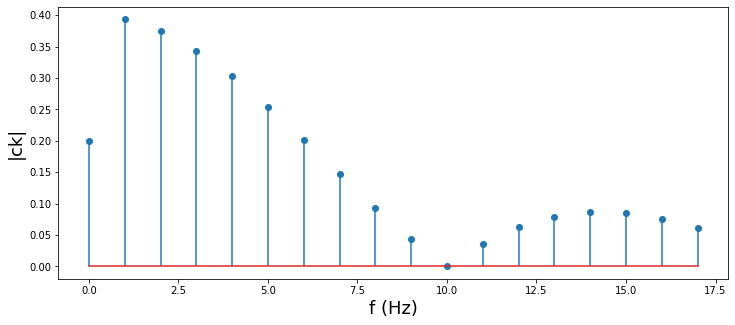

In [9]:
#@title  { run: "auto" , form-width: "30%"}

from IPython.display import Image
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
from scipy import signal

%matplotlib inline

k = sym.Symbol('k')
t = sym.Symbol('t')

###############################################################################
########################### Formulario ########################################
###############################################################################
# Datos a setear
#@markdown períodos a visualizar de la señal :
# ciclos a ver
ciclos = 2 #@param {type:"integer"}
#@markdown frecuencia de la señal en [Hz]: 
# frecuencia de la onda de la serie en [Hz]
f = 1 #@param {type:"number"}
#@markdown forma de la señal:
señal = "cuadrada" #@param ["triangular", "cuadrada"]
#@markdown Duty Cicle (% de tiempo en alto de la señal):
# Duty Cycle en  %
duty =  10#@param {type:"number"}
#@markdown valor constante de la señal (comp. contínua):
# constante (cntinua de la onda)
cte =  1#@param {type:"number"}
#@markdown Amplitud de la señal:
# amplitud de la señal
A =  2#@param {type:"number"}
#@markdown Ver coeficientes numéricos(T/F):
imprimir_coeficiente = False #@param {type:"boolean"}
#@markdown Número de armónicos para aproximar la señal:
Armónicos = 17 #@param {type:"slider", min:0, max:100, step:1}
#@markdown períodos a visualizar de la serie:
n_periodo = 2 #@param [1, 2, 3, 4] {type:"raw"}
#@markdown Ver armónicos(T/F):
ver_armonicos= True #@param {type:"boolean"}
#@markdown Ver componentes coseno(T/F):
comp_cos = False #@param {type:"boolean"}
#@markdown Ver componentes seno(T/F):
comp_sen = True #@param {type:"boolean"}
#@markdown Ver de forma analítica la expansión en series de fourier de la señal(T/F):
imprimir_serie = False #@param {type:"boolean"}

###############################################################################
###############################################################################
###############################################################################


#---cálculos---
# duty
duty_cycle = duty/100
# período
T = 1/f 
# frecuencia angular
w = 2*np.pi*f

t_alto = duty_cycle*T
t_bajo = T-t_alto 
#-------------

Tmin = 0
Tmax = T

if señal=="cuadrada":
    ft = sym.Piecewise((1/2*A+cte, ((t >= 0) & (t < t_alto))),
                       (-1/2*A+cte, ((t >= t_alto) & (t < T))) )

if señal=="triangular":
    ft = sym.Piecewise(((A*t/t_alto)-A/2+cte, ((t >= 0) & (t < t_alto))),
                       (-A*t/t_bajo +A/2+(A*t_alto/t_bajo+cte), ((t >= t_alto) & (t < T))) )


# --------- Funciones --------
# t -> array de datos ; w = frec angular ; duty_cycle = tiempo_alto/tiempo_ciclo  

def __tren__de__pulsos__(x, w, duty_cycle, amp):
     plot = plt.plot(x,signal.square(w*x, duty_cycle)*amp/2+cte, color='k', linewidth=2.0, label="señal f(t)")
     return plot


def __diente__de__sierra__(x, w, duty_cycle, amp):
    p = plt.plot(x,signal.sawtooth(w*x, duty_cycle)*amp/2+cte, color='k', linewidth=2.0, label="señal f(t)")
    return p
# ----------------------------

# array para graficar la señal ft
time_array = np.linspace(0, T*ciclos, 100,endpoint=False)

if señal=="cuadrada":
    __tren__de__pulsos__(time_array, w, duty_cycle, A)
if señal=="triangular":
    __diente__de__sierra__(time_array, w, duty_cycle, A)
    
plt.legend()
plt.show()
print(ft)

# Calculamos la integral para a0
f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
if imprimir_coeficiente==True:
    print("a0 = ")
    sym.pprint(a0)

# Calculamos la integral para ak
f_integral = ft*sym.cos(k*w*t)
ak = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
ak = sym.simplify(ak)
if imprimir_coeficiente==True:
    print("ak = ")
    sym.pprint(ak)

# Calculamos la integral para bk
f_integral = ft*sym.sin(k*w*t)
bk = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
bk = sym.simplify(bk)
if imprimir_coeficiente==True:
    print("bk = ")
    sym.pprint(bk)


#Definimos el número de armónicos para la expansión
serie = 0

plt.figure(figsize=(12,5))
plt.grid()

#v_tiempo = np.linspace(Tmin,2*Tmax,1000)
# Se define el vector de tiempo del eje x de la grafica
v_tiempo  = np.arange(n_periodo*-T/2, n_periodo*T/2, 0.00001)

f0=1/T
ck_array = [] # declaro el array
frec_array = [] # declaro el array
frec_array.append(0)
ck_array.append(abs(a0/2))
ck_c = 0
for i in range(1,Armónicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    ak_c = ak.subs(k,i)
    bk_c = bk.subs(k,i)
    
    if abs(ak_c) < 0.0001: ak_c = 0
    if abs(bk_c) < 0.0001: bk_c = 0
    
    # Se calcula el ck como suma vectorial de ak y bk
    ck_c = (ak_c**2 + bk_c**2)**(1/2)
    ck_array.append(ck_c)
    frec_array.append(i*f0)

    ter_cos = ak_c*sym.cos(i*w*t)
    #print(f"ter_cos: {ter_cos}")
    ter_sen = bk_c*sym.sin(i*w*t)
    serie += ak_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie += bk_c*sym.sin(i*w*t) # Términos seno de la serie
    # graficar términos cosenos
    fter_cos = sym.lambdify(t,ter_cos) # Convertimos la expresión Sympy a una función evaluable
    fter_cos2 = fter_cos(v_tiempo)     # Evaluamos la función en el vector de tiempo
    # graficar términos senos
    fter_sen = sym.lambdify(t,ter_sen) # Convertimos la expresión Sympy a una función evaluable
    fter_sen2 = fter_sen(v_tiempo)     # Evaluamos la función en el vector de tiempo

    if ver_armonicos==True:
        if comp_cos==True:
            if ak_c!=0: 
                plt.plot(v_tiempo,fter_cos2, linewidth=1.5, label="k = {}".format(2*i-1))
        if comp_sen==True:
            if bk_c!=0:
                plt.plot(v_tiempo,fter_sen2, linewidth=1.5, label="k = {}".format(2*i-1))

    serie_graf = a0/2+serie  # Expansión final de la serie
    serie_ = sym.lambdify(t, serie_graf)
    fserieg = serie_(v_tiempo)

plt.plot(v_tiempo,fserieg, c='red',linewidth=3.0, label="serie aditiva")

if señal=="cuadrada":
    __tren__de__pulsos__(v_tiempo, w, duty_cycle, A)
if señal=="triangular":
    __diente__de__sierra__(v_tiempo, w, duty_cycle, A)

plt.xlabel('t (s)',fontsize=18)
plt.ylabel('f (t)',fontsize=18)
plt.legend()
plt.show()

# Se imprime la función en expansión de series
if imprimir_serie==True:
    print('f(t)= ')
    sym.pprint(serie)

plt.figure(figsize=(12,5))
plt.stem(frec_array, ck_array, use_line_collection=True)
plt.xlabel("f (Hz)",fontsize=18)
plt.ylabel('|ck|',fontsize=18)
plt.show()


################################################################################
################################################################################
